# Imports

In [38]:
import glob
import os

import pandas as pd
import screed
import seaborn as sns

# Handwritten local modules
from mya_utils import BUSCO_MAMMALIA_SPECIES, distance_from_human_mya

from nb_utils import describe

from path_constants import FIGURE_FOLDER, MAMMALIA_BUSCO_SUBSET_FOLDER

In [32]:
# from plot_constants import PROTEIN_COLOR, DAYHOFF_COLOR, MOLTYPE_PALETTE, MOLTYPE_ORDER, ALPHABET_KSIZES, ALPHABET_PALETTES

# Analyze protien-coding classification metrics

## Get k-mer complexity per species

In [33]:
csv = os.path.join(
    MAMMALIA_BUSCO_SUBSET_FOLDER, "busco_mammalia_kmer_complexity_all_species.csv"
)
kmer_complexity = pd.read_csv(csv)
kmer_complexity['moltype'] = kmer_complexity.molecule.str.strip('0123456789')
kmer_complexity = kmer_complexity.join(BUSCO_MAMMALIA_SPECIES, on='name')
kmer_complexity

,name,molecule,ksize,sigma,expected_collisions,n_unique_kmers,n_theoretical_kmers_log10,n_unique_kmers_log10,unique_over_theoretical_log10,moltype,common_name,scientific_name,mya
0,aotus_nancymaae,dayhoff6,17,6,1.343059e-06,3463840,13.228571,6.539558,-6.689013,dayhoff,night monkey,Aotus nancymaae,43.2
1,aotus_nancymaae,protein20,8,20,1.421344e-06,3513425,10.408240,6.545731,-3.862509,protein,night monkey,Aotus nancymaae,43.2
2,tupaia_chinensis,dayhoff6,17,6,6.506573e-10,506371,13.228571,5.704469,-7.524102,dayhoff,tupaia,Tupaia chinensis,82.0
3,tupaia_chinensis,protein20,8,20,7.144468e-10,518316,10.408240,5.714595,-4.693645,protein,tupaia,Tupaia chinensis,82.0
4,phascolarctos_cinereus,dayhoff6,17,6,2.616793e-18,4022,13.228571,3.604442,-9.624129,dayhoff,koala,Phascolarctos cinereus,159.0
5,phascolarctos_cinereus,protein20,8,20,2.757474e-18,4075,10.408240,3.610128,-6.798112,protein,koala,Phascolarctos cinereus,159.0
6,erinaceus_europaeus,dayhoff6,17,6,7.888326e-06,5445706,13.228571,6.736054,-6.492517,dayhoff,hedgehog,Erinaceus europaeus,96.0
7,erinaceus_europaeus,protein20,8,20,8.199259e-06,5499456,10.408240,6.740320,-3.667920,protein,hedgehog,Erinaceus europaeus,96.0
8,ceratotherium_simum_simum,dayhoff6,17,6,5.062512e-24,150,13.228571,2.176091,-11.052480,dayhoff,rhino,Ceratotherium simum simum,96.0
9,ceratotherium_simum_simum,protein20,8,20,6.391305e-24,159,10.408240,2.201397,-8.206843,protein,rhino,Ceratotherium simum simum,96.0


## Get number of protein sequences per species

In [34]:
busco_mammalia_species = BUSCO_MAMMALIA_SPECIES.copy()


col = 'proteome_size'
busco_mammalia_species[col] = 0
for fasta in glob.glob(os.path.join(MAMMALIA_BUSCO_SUBSET_FOLDER, '*.fasta')):
    species_lower = os.path.basename(fasta).split('__')[-1].split('.')[0]
    proteome_size = sum(1 for _ in screed.open(fasta))
    
    busco_mammalia_species.loc[species_lower, col] = proteome_size 
busco_mammalia_species = busco_mammalia_species.sort_values('mya')
describe(busco_mammalia_species)


(18, 4)
--- First 5 entries ---


,common_name,scientific_name,mya,proteome_size
scientific_lower,,,,
homo_sapiens,human,Homo sapiens,0.0,15066
macaca_mulatta,macaque,Macaca mulatta,29.4,5008
aotus_nancymaae,night monkey,Aotus nancymaae,43.2,7261
tupaia_chinensis,tupaia,Tupaia chinensis,82.0,1338
mus_musculus,house mouse,Mus musculus,90.0,14519


# SFig 1A


### Plot proteome sizes

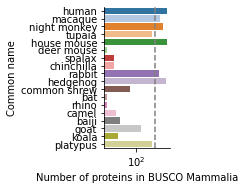

In [39]:
# fig, ax = plt.subplots(figsize=(2.75, 2.5))
g = sns.catplot(
    data=busco_mammalia_species,
    y='common_name',
    x='proteome_size',
    palette='tab20',
    kind='bar',
    order=distance_from_human_mya.index,
    height=2.5
#     order=
)
# sns.despine()
g.set(xscale='log', xlabel='Number of proteins in BUSCO Mammalia', ylabel='Common name')
for ax in g.axes.flat:
    ax.axvline(2e3, linestyle='--', color='grey')

pdf = os.path.join(FIGURE_FOLDER, 'orpheum_translate__proteome_size_barplots.pdf')
g.savefig(pdf)